In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import grid_search
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [8]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    transposed = tx.transpose()
    w = np.linalg.inv(transposed.dot(tx)).dot(transposed).dot(y)
    e = y - tx.dot(w)
    mse = (1/(2*len(y)))*e.dot(e.transpose())
    
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [9]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    w0, w1 = grid_search.generate_w(100)
    print("Grid Search :" + str(grid_search.get_best_parameters(w0, w1, grid_search.grid_search(y, tx, w0, w1))))
    print("Least Squares : " + str(least_squares(y, tx)))
    return

Test it here

In [10]:
test_your_least_squares()

Grid Search :(15.55870336860953, 72.72727272727272, 13.636363636363626)
Least Squares : (15.385887868829402, array([73.293922  , 13.47971243]))


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [11]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


###### Note : Checkout the broadcast operation on Numpy, to understand what is done here

In [12]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    
    return x.reshape((-1, 1)) ** np.array([range(0,degree+1)])

#### Testing the construction of the array of powers

In [13]:
np.array([range(0, 10)])

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [14]:
#from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        tx = build_poly(x, degree)
        mse, weights = least_squares(y, tx)
        rmse = np.sqrt(2 * mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773749
Processing 3th experiment, degree=7, rmse=0.24965870360908396
Processing 4th experiment, degree=12, rmse=0.9268294526468844


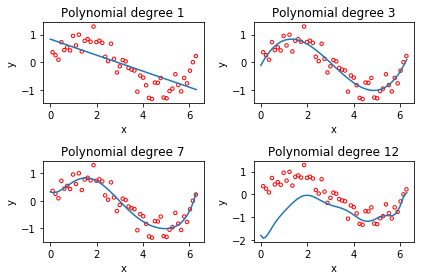

In [15]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [16]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    
    return x[0:int(np.round(len(x)*ratio))] , y[0:int(np.round(len(x)*ratio))], x[int(np.round(len(x)*ratio)):len(x)], y[int(np.round(len(x)*ratio)):len(y)]

In [17]:
f = [1,2,3,4,5,6,7]
f[0:2]

[1, 2]

Then, test your `split_data` function below.

##### Importing How to compute the MSE from previous exercice

In [18]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    return calculate_mse(e)

### Exercice itselft

In [19]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    training_x, training_y, test_x, test_y = split_data(x,y,ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx = build_poly(training_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse, weights = least_squares(training_y, tx)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2 * mse)
    
    # Computing the RMSE of the testing data
    rmse_te = compute_loss(test_y, build_poly(test_x, degree), weights)
    
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [20]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.488, Testing RMSE=0.044
proportion=0.9, degree=3, Training RMSE=0.266, Testing RMSE=0.019
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.017
proportion=0.9, degree=12, Training RMSE=0.268, Testing RMSE=0.017
proportion=0.5, degree=1, Training RMSE=0.458, Testing RMSE=0.150
proportion=0.5, degree=3, Training RMSE=0.261, Testing RMSE=0.036
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.049
proportion=0.5, degree=12, Training RMSE=0.593, Testing RMSE=0.207
proportion=0.1, degree=1, Training RMSE=0.597, Testing RMSE=0.123
proportion=0.1, degree=3, Training RMSE=0.027, Testing RMSE=0.100
proportion=0.1, degree=7, Training RMSE=2.582, Testing RMSE=4.689
proportion=0.1, degree=12, Training RMSE=15.034, Testing RMSE=12220194758.232


# 3 Ridge Regression
Please fill in the function below.

In [40]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    xT = tx.transpose()
    a = np.linalg.inv(xT.dot(tx) + lambda_*np.identity(len(y)))
    return a.dot(xT).dot(y)

In [41]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    training_x, training_y, test_x, test_y = split_data(x,y,ratio, seed)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx = build_poly(training_x, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weights = ridge_regression(training_y, tx, lambda_)
        rmse_tr.append(np.sqrt(2*compute_loss(training_y, tx, weights)))
        rmse_te.append(np.sqrt(2*compute_loss(test_y, tx, weights)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    raise NotImplementedError


In [42]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

ValueError: operands could not be broadcast together with shapes (8,8) (25,25) 